# Process Predictions

In [1]:
%matplotlib inline
#%pylab inline
import sys,os,re,csv,glob,collections,itertools,pickle,datetime
import pandas as pd
import numpy as np
import dateutil
import numpy.ma as ma
import matplotlib
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import gdal
import scipy.io
import matplotlib.image as mpimg
import urllib

from scipy.misc import imresize
from scipy.stats import mode
from sklearn.decomposition import FastICA as ICA
from sklearn.decomposition import PCA
from scipy.ndimage.filters import gaussian_filter as gaussfilter
from sklearn.neighbors import KDTree
from mapbox import Static
from tqdm import tqdm
from gdalconst import *
from scipy.misc import imresize
from scipy.misc import imsave
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from shapely.geometry import Point as SPoint
from shapely.geometry.polygon import Polygon as SPolygon

plt.rcParams['figure.figsize'] = (14, 14) 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray'

### Read HTML

In [2]:
lines = []
with open('../../data/OSMNet/Uganda/infer/Infer Many Images.htm','r') as f:
    for line in f:
        lines.append(line)

### Extract Inferred Images

In [19]:
filenames = []
orignames = []
destnames = []
for i in range(len(lines)):
    thisline = lines[i]
    if (len(thisline) > 15000):
        filename = '../../data/OSMNet/Uganda/infer' + lines[i-2][57:-9] + 'jpeg'
        origname = '../../data/OSMNet/Uganda/val/images/' + lines[i-2][57:-9] + 'png'
        destname = '../../data/OSMNet/Uganda/val/signed/' + lines[i-2][57:-9] + 'png' 
        filenames.append(filename)
        orignames.append(origname)
        destnames.append(destname)
        im = thisline
        im = im[33:-32]
        fh = open(filename, "wb")
        fh.write(im.decode('base64'))
        fh.close()

In [20]:
print orignames

['../../data/OSMNet/Uganda/val/images/1.png', '../../data/OSMNet/Uganda/val/images/100.png', '../../data/OSMNet/Uganda/val/images/1001.png', '../../data/OSMNet/Uganda/val/images/101.png', '../../data/OSMNet/Uganda/val/images/1013.png', '../../data/OSMNet/Uganda/val/images/102.png', '../../data/OSMNet/Uganda/val/images/1026.png', '../../data/OSMNet/Uganda/val/images/1027.png', '../../data/OSMNet/Uganda/val/images/1038.png', '../../data/OSMNet/Uganda/val/images/104.png', '../../data/OSMNet/Uganda/val/images/1041.png', '../../data/OSMNet/Uganda/val/images/105.png', '../../data/OSMNet/Uganda/val/images/1052.png', '../../data/OSMNet/Uganda/val/images/1059.png', '../../data/OSMNet/Uganda/val/images/1062.png', '../../data/OSMNet/Uganda/val/images/1083.png', '../../data/OSMNet/Uganda/val/images/1084.png', '../../data/OSMNet/Uganda/val/images/1085.png', '../../data/OSMNet/Uganda/val/images/1090.png', '../../data/OSMNet/Uganda/val/images/1097.png', '../../data/OSMNet/Uganda/val/images/1099.png',

### Visualize

255


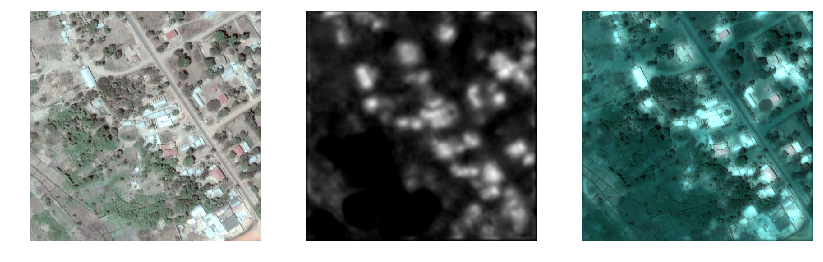

In [33]:
randval = np.random.randint(len(orignames))
orig = mpimg.imread(orignames[randval])
dest = mpimg.imread(filenames[randval])

plt.subplot(1,3,1);
plt.imshow(orig);
plt.axis('off')
plt.subplot(1,3,2);
plt.imshow(dest);
plt.axis('off')

print np.max(dest)
dest = dest.astype(float)
thres = dest / np.max(dest)
# median = np.percentile(thres,95)
# thres = thres > median
# thres = thres.astype(float)

# plt.subplot(2,2,3);
# plt.imshow(thres);
# plt.axis('off')

marked = orig.copy()
marked[:,:,0] = marked[:,:,0] * (thres + 0.15)
marked[:,:,1] = marked[:,:,1] * (thres + 0.5)
marked[:,:,2] = marked[:,:,2] * (thres + 0.5)
marked[marked > 1] = 1
plt.subplot(1,3,3);
plt.imshow(marked);
plt.axis('off');